In [74]:
from rllab.misc.nb_utils import ExperimentDatabase
import matplotlib.pyplot as plt
%matplotlib inline
import os
import joblib
import numpy as np

In [108]:
database = ExperimentDatabase("./data/")

[Errno 2] No such file or directory: './data/crossE/progress.csv'
A value in the csv is not a float
A value in the csv is not a float
A value in the csv is not a float
A value in the csv is not a float
A value in the csv is not a float
A value in the csv is not a float
A value in the csv is not a float
A value in the csv is not a float
A value in the csv is not a float
A value in the csv is not a float
A value in the csv is not a float
A value in the csv is not a float
A value in the csv is not a float
A value in the csv is not a float
A value in the csv is not a float
A value in the csv is not a float


In [109]:
exps = database._experiments
for exp in exps:
    print exp.params['exp_name']

bimodal_1d_mdp
multimodal_1step_var01
multimodal_1step_var01_100iter_all
multimodal_mdp1_var01
point_mdp1
trpo_cartpole


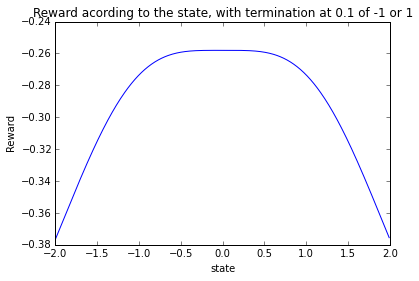

In [92]:
#How the reward function looks like
d = 1
def reward(x): return 1./(2.*np.sqrt(2.*np.pi))*(np.exp(-0.5*(x-d)**2)+np.exp(-0.5*(x+d)**2)) - 0.5
x = np.arange(-2, 2, 0.01)
plt.plot(x,reward(x))
plt.title('Reward acording to the state, with termination at 0.1 of -1 or 1')
plt.xlabel('state')
plt.ylabel('Reward')

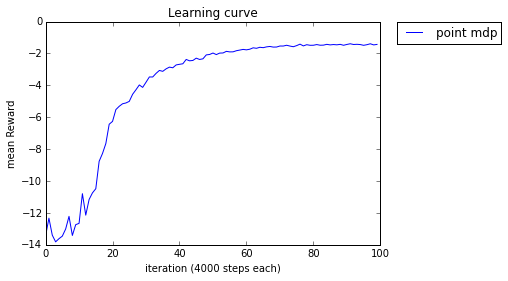

In [93]:
#Plot learning curve
for exp in exps:
    if 'bimodal_1d_mdp' in exp.params['exp_name']:
#         dvg = exp.params['algo']['dvg']
#         lab = "dvg = {}".format(dvg) if dvg else "Baseline"
        lab = "point mdp"
        plt.plot(exp.progress['AverageDiscountedReturn'], label = lab )
    elif exp.params['exp_name']=='trpo_hopper_1000n':
        lab = "Original TRPO"
        plt.plot(exp.progress['AverageDiscountedReturn'], label = lab )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Learning curve')
plt.xlabel('iteration (4000 steps each)')
plt.ylabel('mean Reward')

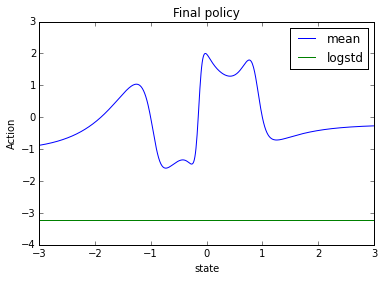

In [98]:
#final policy learned
data_bimodal_1d = joblib.load('./data/bimodal_1d_mdp/params.pkl')
poli = data_bimodal_1d['policy']

poli.get_action(np.array((3,)))
x = np.arange(-3,3,0.01)
means = np.zeros(np.size(x))
logstd = np.zeros(np.size(x))
for i,s in enumerate(x):
    means[i] = poli.get_action(np.array((s,)))[1][0]
    logstd[i] = poli.get_action(np.array((s,)))[1][1]
plt.plot(x, means, label = 'mean')
plt.plot(x, logstd, label = 'logstd')
plt.legend(loc = 1)
plt.title('Final policy')
plt.xlabel('state')
plt.ylabel('Action')

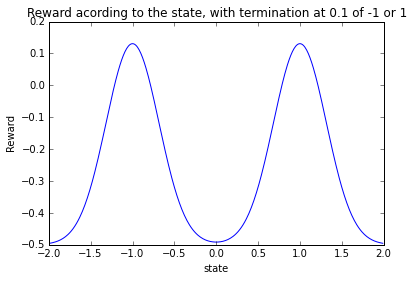

In [123]:
#How the reward function looks like
d = 1
def reward(x): return 1./(2.*np.sqrt(2.*np.pi*0.1))*(np.exp(-0.5/0.1*(x-d)**2)+np.exp(-0.5/0.1*(x+d)**2)) - 0.5
x = np.arange(-2, 2, 0.01)
plt.plot(x,reward(x))
plt.title('Reward acording to the state, with termination at 0.1 of -1 or 1')
plt.xlabel('state')
plt.ylabel('Reward')

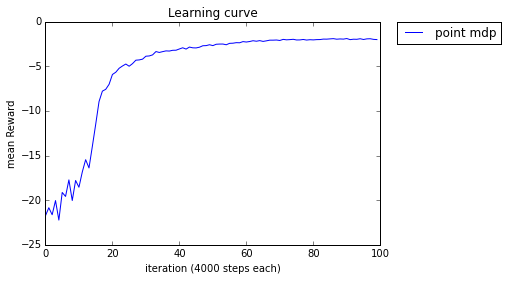

In [99]:
#Plot learning curve
for exp in exps:
    if 'multimodal_mdp1_var01' in exp.params['exp_name']:
#         dvg = exp.params['algo']['dvg']
#         lab = "dvg = {}".format(dvg) if dvg else "Baseline"
        lab = "point mdp"
        plt.plot(exp.progress['AverageDiscountedReturn'], label = lab )
    elif exp.params['exp_name']=='trpo_hopper_1000n':
        lab = "Original TRPO"
        plt.plot(exp.progress['AverageDiscountedReturn'], label = lab )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Learning curve')
plt.xlabel('iteration (4000 steps each)')
plt.ylabel('mean Reward')

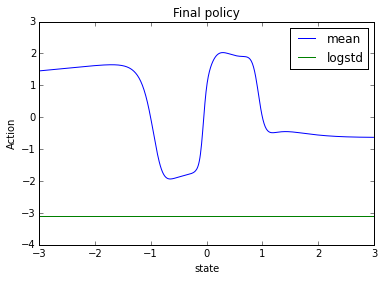

In [97]:
data_bimodal_1d = joblib.load('./data/multimodal_mdp1_var01/params.pkl')
poli = data_bimodal_1d['policy']

poli.get_action(np.array((3,)))
x = np.arange(-3,3,0.01)
means = np.zeros(np.size(x))
logstd = np.zeros(np.size(x))
for i,s in enumerate(x):
    means[i] = poli.get_action(np.array((s,)))[1][0]
    logstd[i] = poli.get_action(np.array((s,)))[1][1]
plt.plot(x, means, label = 'mean')
plt.plot(x, logstd, label = 'logstd')
plt.legend(loc = 1)
plt.title('Final policy')
plt.xlabel('state')
plt.ylabel('Action')

## One-step MDP, 0-restart
We will use this bandit-like problem in which we have only one shot at every iteration. Obviously the policy is a Gaussian so it will have to put all its weight in one of the two higher reward options (now -0.1 or 0.1).

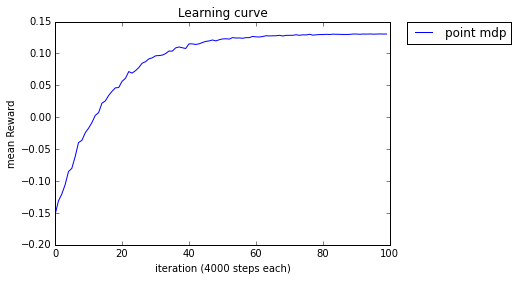

In [100]:
#Plot learning curve
for exp in exps:
    if 'multimodal_1step_var01' in exp.params['exp_name']:
#         dvg = exp.params['algo']['dvg']
#         lab = "dvg = {}".format(dvg) if dvg else "Baseline"
        lab = "point mdp"
        plt.plot(exp.progress['AverageDiscountedReturn'], label = lab )
    elif exp.params['exp_name']=='trpo_hopper_1000n':
        lab = "Original TRPO"
        plt.plot(exp.progress['AverageDiscountedReturn'], label = lab )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Learning curve')
plt.xlabel('iteration (4000 steps each)')
plt.ylabel('mean Reward')

The mean and logstd at 0 are: -0.14664396384 and 7.07006594026


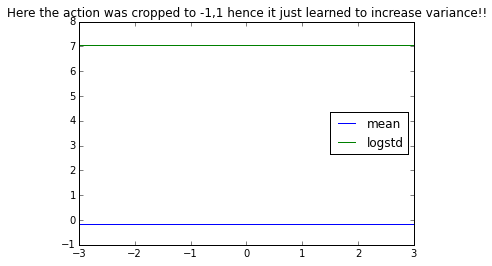

In [103]:
#final policy learned
data_bimodal_1d = joblib.load('./data/multimodal_1step_var01/params.pkl')
poli = data_bimodal_1d['policy']

poli.get_action(np.array((3,)))
x = np.arange(-3,3,0.01)
means = np.zeros(np.size(x))
logstd = np.zeros(np.size(x))
print 'The mean and logstd at 0 are: {} and {}'.format(poli.get_action(np.array((s,)))[1][0], poli.get_action(np.array((s,)))[1][1])
for i,s in enumerate(x):
    means[i] = poli.get_action(np.array((s,)))[1][0]
    logstd[i] = poli.get_action(np.array((s,)))[1][1]
plt.plot(x, means, label = 'mean')
plt.plot(x, logstd, label = 'logstd')
plt.legend(loc = 5)
plt.title("Here the action was cropped to -1,1 hence it just learned to increase variance!!")

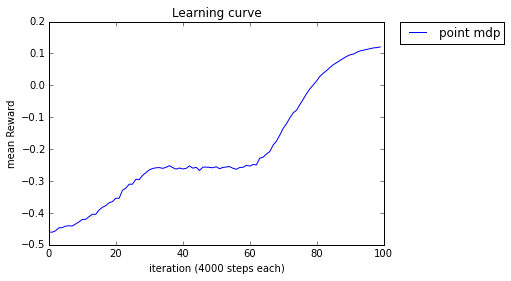

In [126]:
#Plot learning curve
for exp in exps:
    if 'multimodal_1step_var01_100iter_all' in exp.params['exp_name']:
#         dvg = exp.params['algo']['dvg']
#         lab = "dvg = {}".format(dvg) if dvg else "Baseline"
        lab = "point mdp"
        plt.plot(exp.progress['AverageDiscountedReturn'], label = lab )
    elif exp.params['exp_name']=='trpo_hopper_1000n':
        lab = "Original TRPO"
        plt.plot(exp.progress['AverageDiscountedReturn'], label = lab )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Learning curve')
plt.xlabel('iteration (4000 steps each)')
plt.ylabel('mean Reward')

The mean and logstd at 0 are: -0.0998789473875 and -5.21050630527


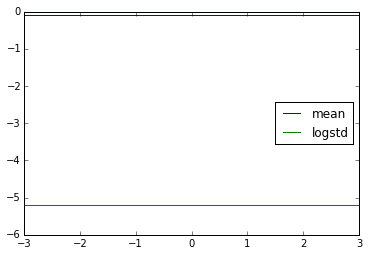

In [119]:
#final policy learned
data_bimodal_1d = joblib.load('./data/multimodal_1step_var01_100iter_all/itr_99.pkl')
poli = data_bimodal_1d['policy']

poli.get_action(np.array((3,)))
x = np.arange(-3,3,0.01)
means = np.zeros(np.size(x))
logstd = np.zeros(np.size(x))
print 'The mean and logstd at 0 are: {} and {}'.format(poli.get_action(np.array((0,)))[1][0], poli.get_action(np.array((0,)))[1][1])
for i,s in enumerate(x):
    means[i] = poli.get_action(np.array((s,)))[1][0]
    logstd[i] = poli.get_action(np.array((s,)))[1][1]
plt.plot(x, means, label = 'mean')
plt.plot(x, logstd, label = 'logstd')
plt.legend(loc = 5)

In [128]:
mean_at_0 = []
var_at_0 = []
for itr in range(100):
    data_bimodal_1d = joblib.load('./data/multimodal_1step_var01_100iter_all/itr_{}.pkl'.format(itr))
    poli = data_bimodal_1d['policy']
    action_at_0 = poli.get_action(np.array((0,)))
    mean_at_0.append(action_at_0[1][0])
    var_at_0.append(action_at_0[1][1])
    print "sampled action in iter {}: {}. Reward should be: {}".format(itr, action_at_0[0], reward(action_at_0[0]))

sampled action in iter 0: [-1.05960106]. Reward should be: [ 0.11967843]
sampled action in iter 1: [-0.55230429]. Reward should be: [-0.26844422]
sampled action in iter 2: [-0.07384125]. Reward should be: [-0.4893688]
sampled action in iter 3: [ 0.67854209]. Reward should be: [-0.12373734]
sampled action in iter 4: [ 0.83457143]. Reward should be: [ 0.05011597]
sampled action in iter 5: [-0.28292962]. Reward should be: [-0.45160029]
sampled action in iter 6: [ 0.32952302]. Reward should be: [-0.43327113]
sampled action in iter 7: [ 0.42051528]. Reward should be: [-0.38229612]
sampled action in iter 8: [ 0.03326169]. Reward should be: [-0.49107458]
sampled action in iter 9: [ 1.07619141]. Reward should be: [ 0.1127374]
sampled action in iter 10: [ 0.43680593]. Reward should be: [-0.37082282]
sampled action in iter 11: [ 0.07148851]. Reward should be: [-0.48950507]
sampled action in iter 12: [ 0.03142378]. Reward should be: [-0.49112043]
sampled action in iter 13: [ 0.25182177]. Reward s

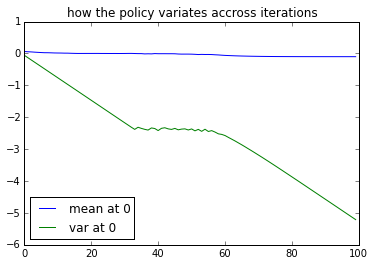

In [122]:
itr = range(100)
plt.plot(itr,mean_at_0, label = 'mean at 0')
plt.plot(itr,var_at_0, label = 'var at 0')
plt.title('how the policy variates accross iterations')
plt.legend(loc=3)